In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.manifold import MDS
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn_extra.cluster import KMedoids


In [3]:
#load datasets PRM, CHA, L1, L2 from csv and drop NaN values
PRM = pd.read_csv('PRM.csv')
PRM = PRM.dropna()
CHA = pd.read_csv('CHA.csv')
CHA = CHA.dropna()
L1 = pd.read_csv('L1.csv')
L1 = L1.dropna()
L2 = pd.read_csv('L2.csv')
L2 = L2.dropna()



In [4]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer

In [5]:
#create a hierarchical clustering model
from sklearn.cluster import AgglomerativeClustering


In [6]:
#for each dataset create a dendrogram that groups referees by their B365H odds
# #PRM
# plt.figure(figsize=(20,10))
# plt.title('Hierarchical Clustering Dendrogram')
# plt.xlabel('sample index')
# plt.ylabel('distance')
# dendrogram(
#     linkage(PRM[['B365H']], method="ward")
# )
# plt.show()

# #only show the last 10 clusters
# plt.figure(figsize=(20,10))
# plt.title('Hierarchical Clustering Dendrogram')
# plt.xlabel('sample index')
# plt.ylabel('distance')
# dendrogram(
#     linkage(PRM[['B365H']], method="ward"),
#     truncate_mode='lastp',
#     p=10
# )
# plt.show()

In [7]:
#for each dataset calculate mean of B365H odds for each referee
PRM_a = PRM[["Referee","B365H"]]
PRM_a = PRM_a.set_index("Referee")
PRM_a = PRM_a.groupby("Referee").mean()

CHA_a = CHA[["Referee","B365H"]]
CHA_a = CHA_a.set_index("Referee")
CHA_a = CHA_a.groupby("Referee").mean()

L1_a = L1[["Referee","B365H"]]
L1_a = L1_a.set_index("Referee")
L1_a = L1_a.groupby("Referee").mean()

L2_a = L2[["Referee","B365H"]]
L2_a = L2_a.set_index("Referee")
L2_a = L2_a.groupby("Referee").mean() 

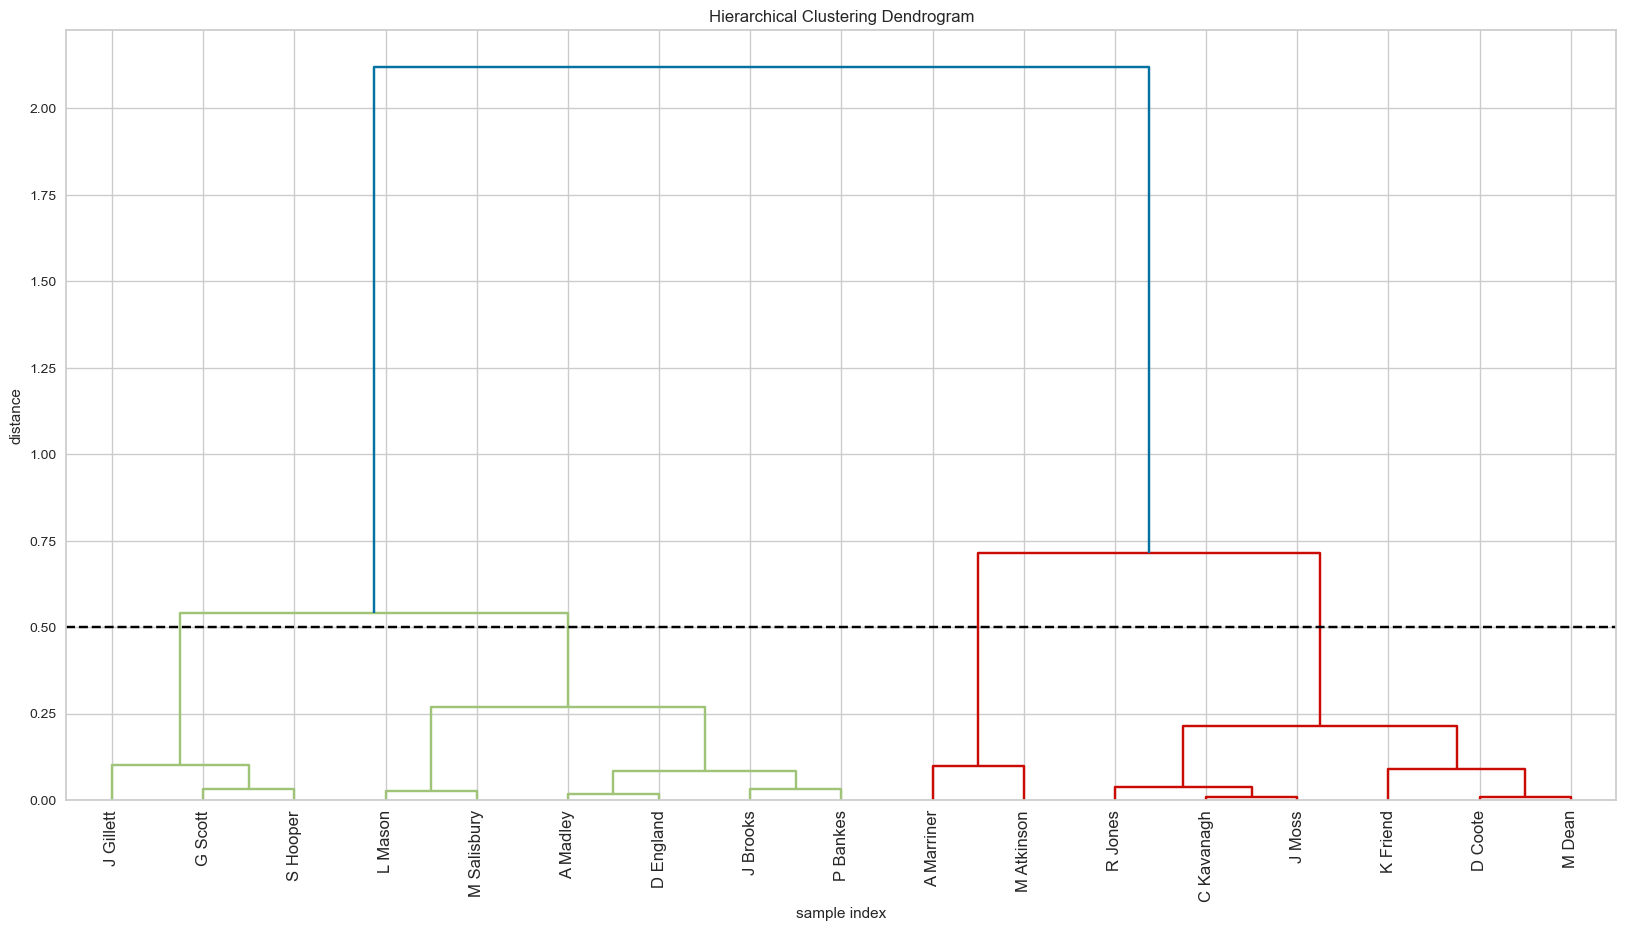

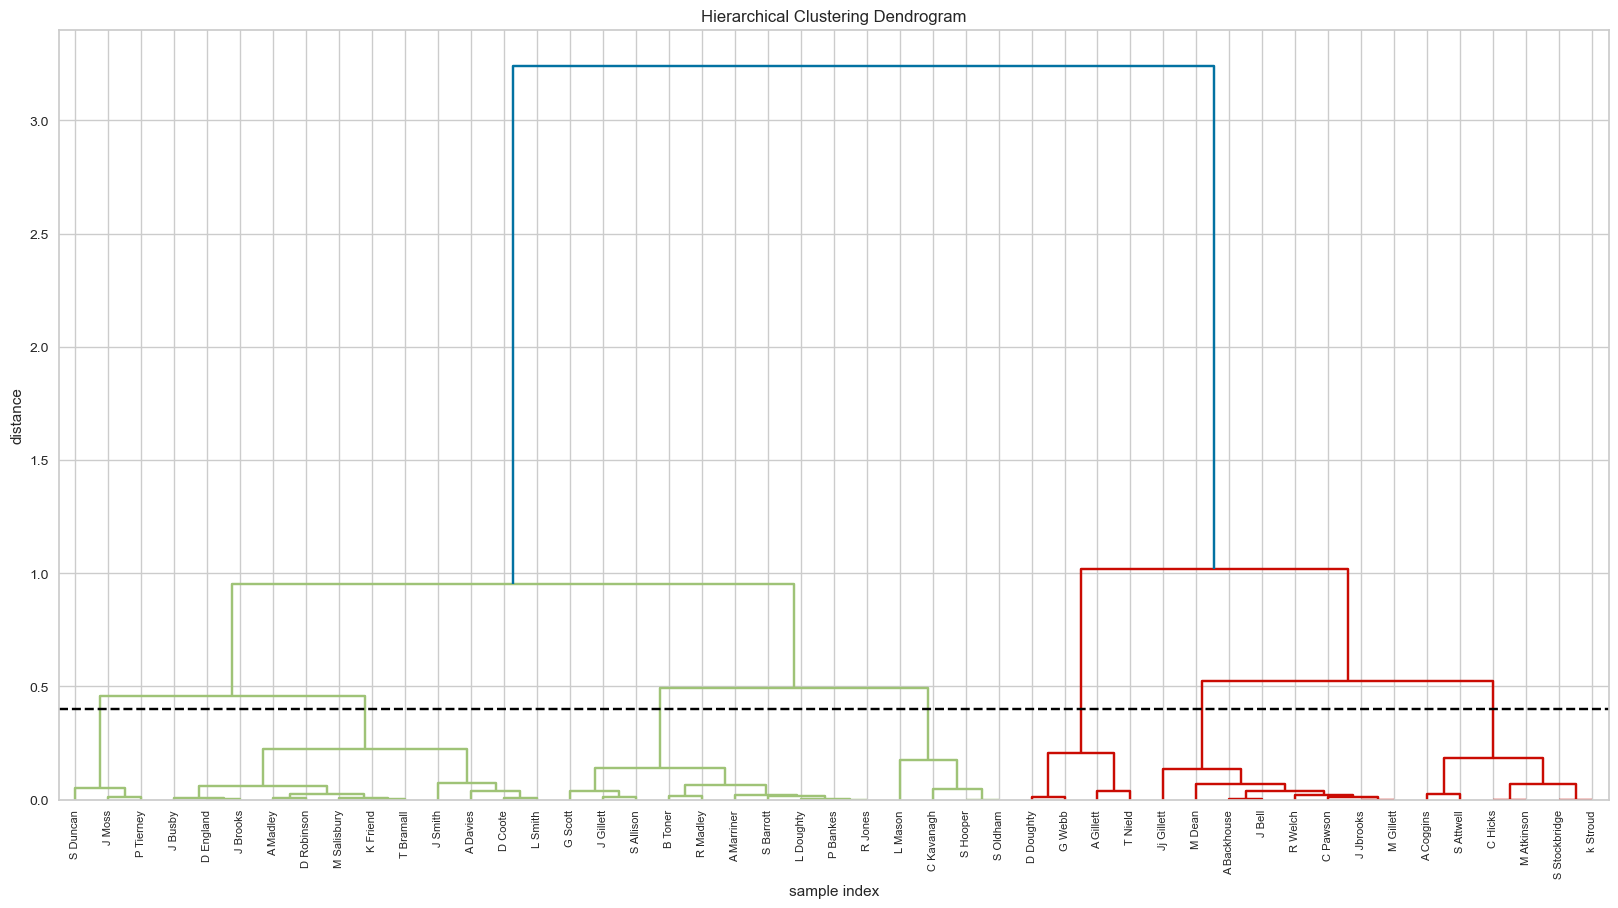

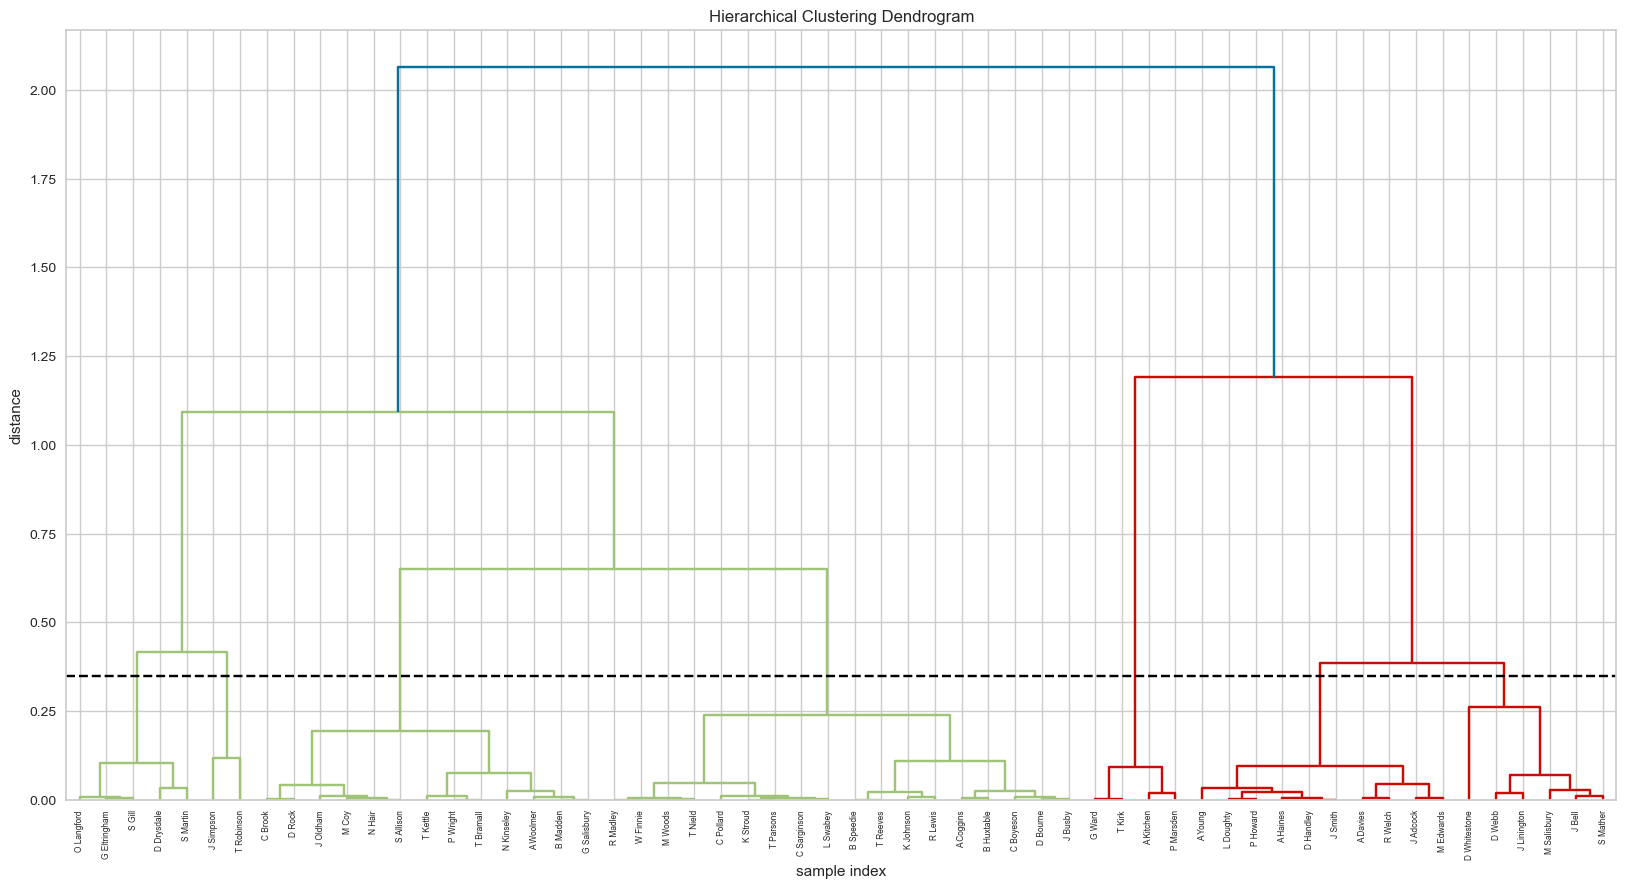

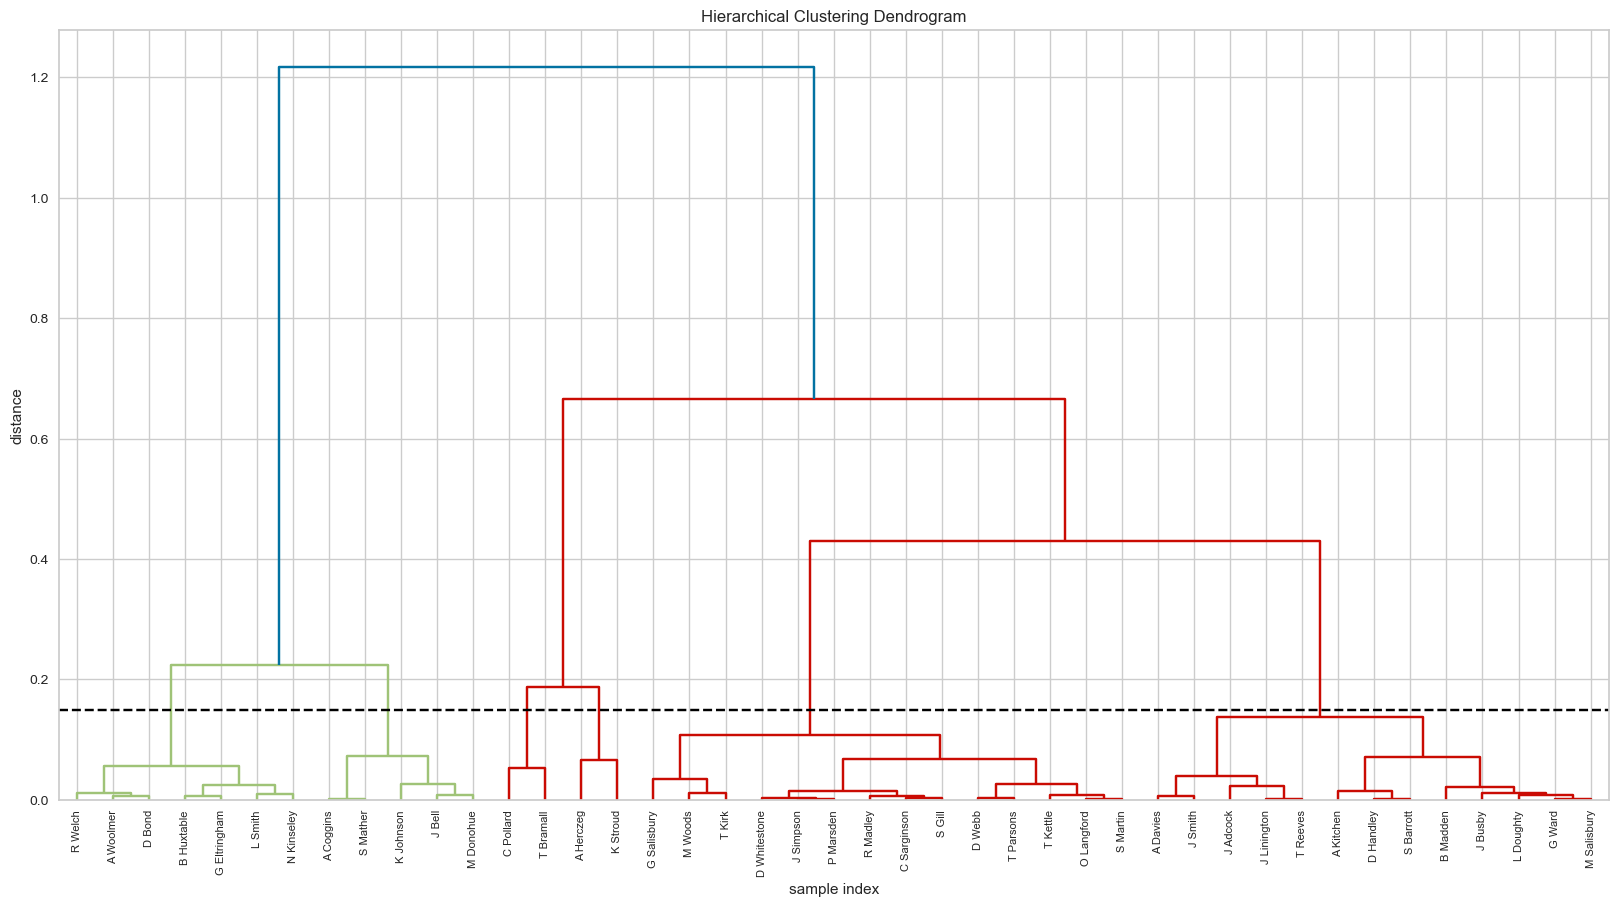

In [8]:
#for each dataset create a dendrogram that groups referees by their B365H odds with index as referee name
#PRM
plt.figure(figsize=(20,10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    linkage(PRM_a, method="ward"),
    labels=PRM_a.index,
    leaf_rotation=90
)
plt.axhline(y=0.5,ls='--',c='black')
plt.show()

#CHA
plt.figure(figsize=(20,10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    linkage(CHA_a, method="ward"),
    labels=CHA_a.index,
    leaf_rotation=90
)
plt.axhline(y=0.4,ls='--',c='black')
plt.show()

#L1
plt.figure(figsize=(20,10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    linkage(L1_a, method="ward"),
    labels=L1_a.index,
    leaf_rotation=90
)
plt.axhline(y=0.35,ls='--',c='black')
plt.show()

#L2
plt.figure(figsize=(20,10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    linkage(L2_a, method="ward"),
    labels=L2_a.index,
    leaf_rotation=90
)
plt.axhline(y=0.15,ls='--',c='black')
plt.show()

In [9]:
PRM_b = PRM[["Referee","FTR"]]
PRM_b = PRM_b.set_index("Referee")
PRM_b = PRM_b.groupby("Referee").count()

CHA_b = CHA[["Referee","FTR"]]
CHA_b = CHA_b.set_index("Referee")
CHA_b = CHA_b.groupby("Referee").count()

L1_b = L1[["Referee","FTR"]]
L1_b = L1_b.set_index("Referee")
L1_b = L1_b.groupby("Referee").count()

L2_b = L2[["Referee","FTR"]]
L2_b = L2_b.set_index("Referee")
L2_b = L2_b.groupby("Referee").count()

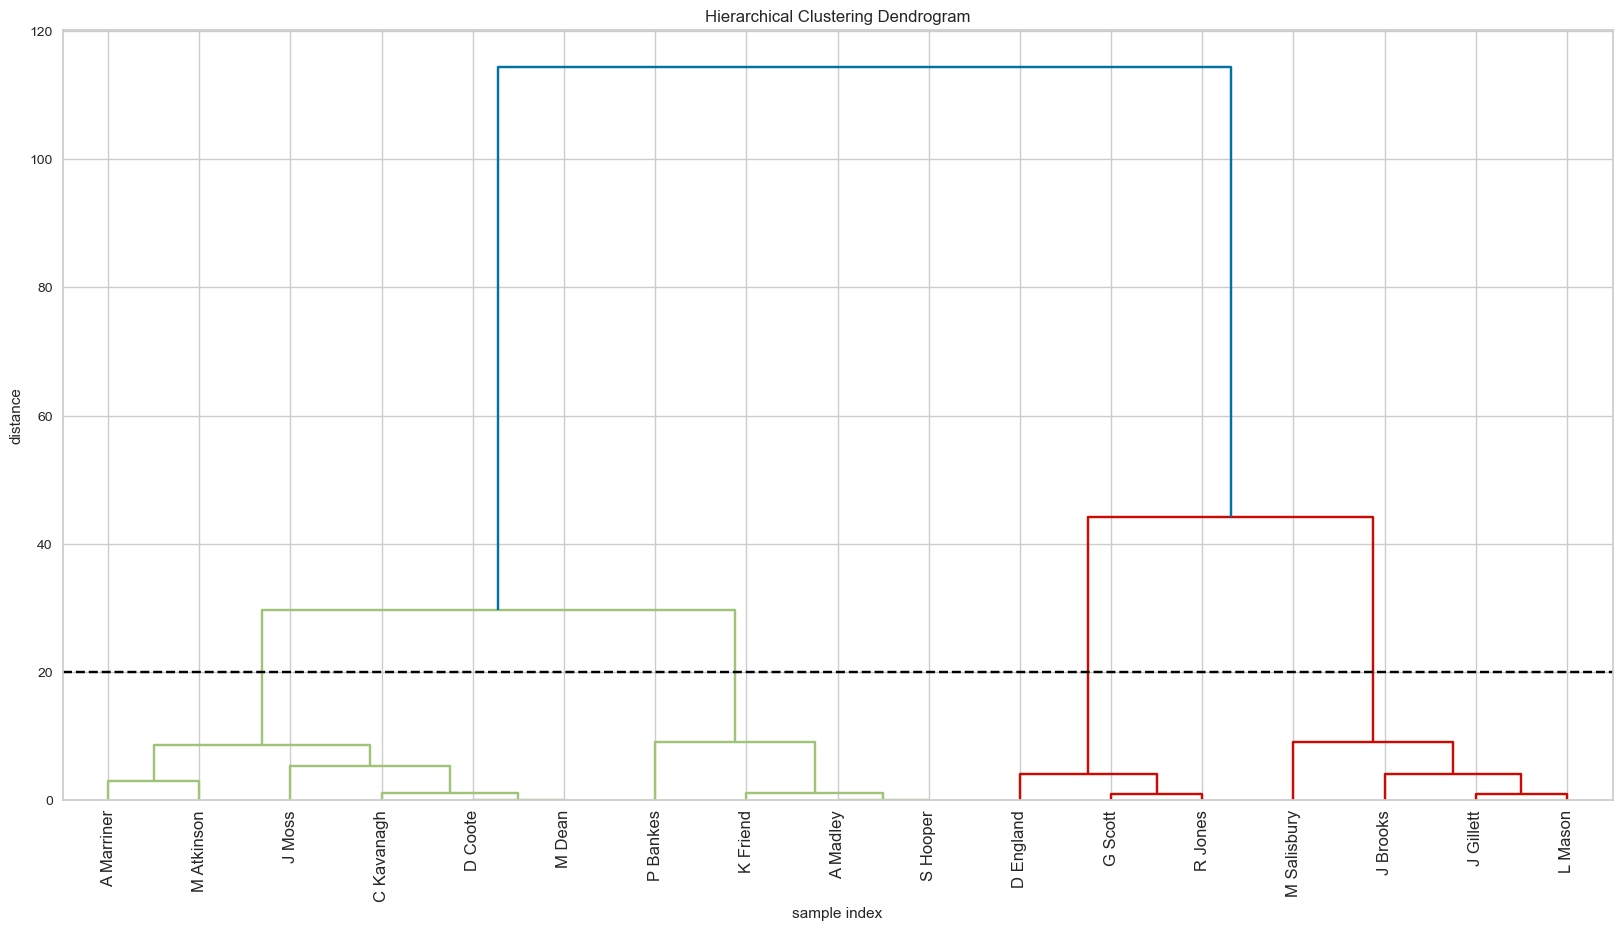

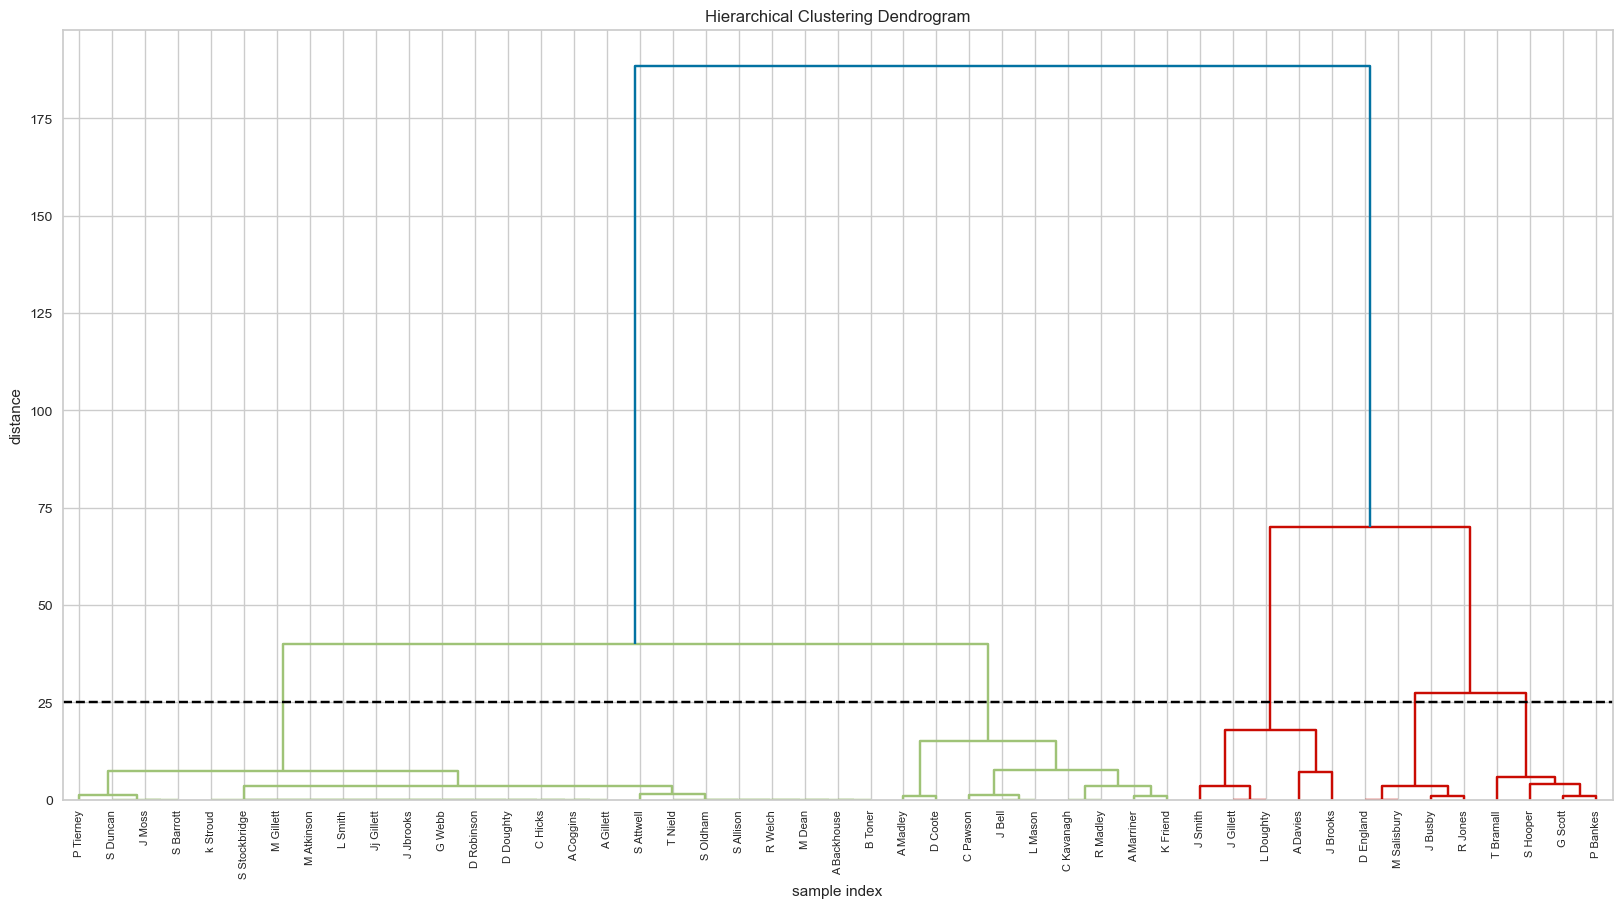

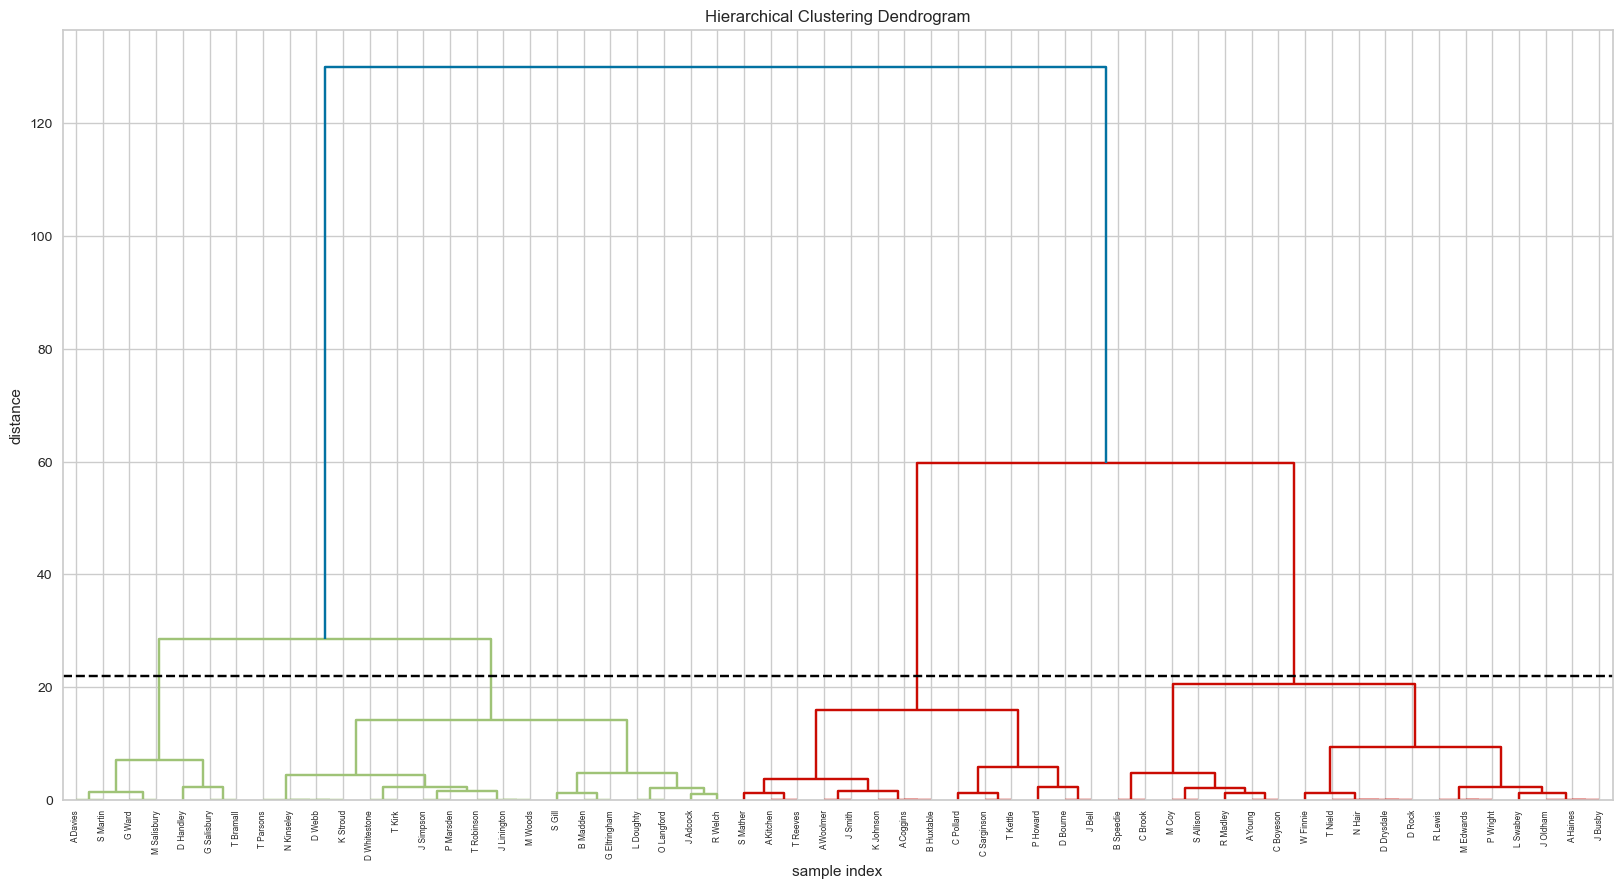

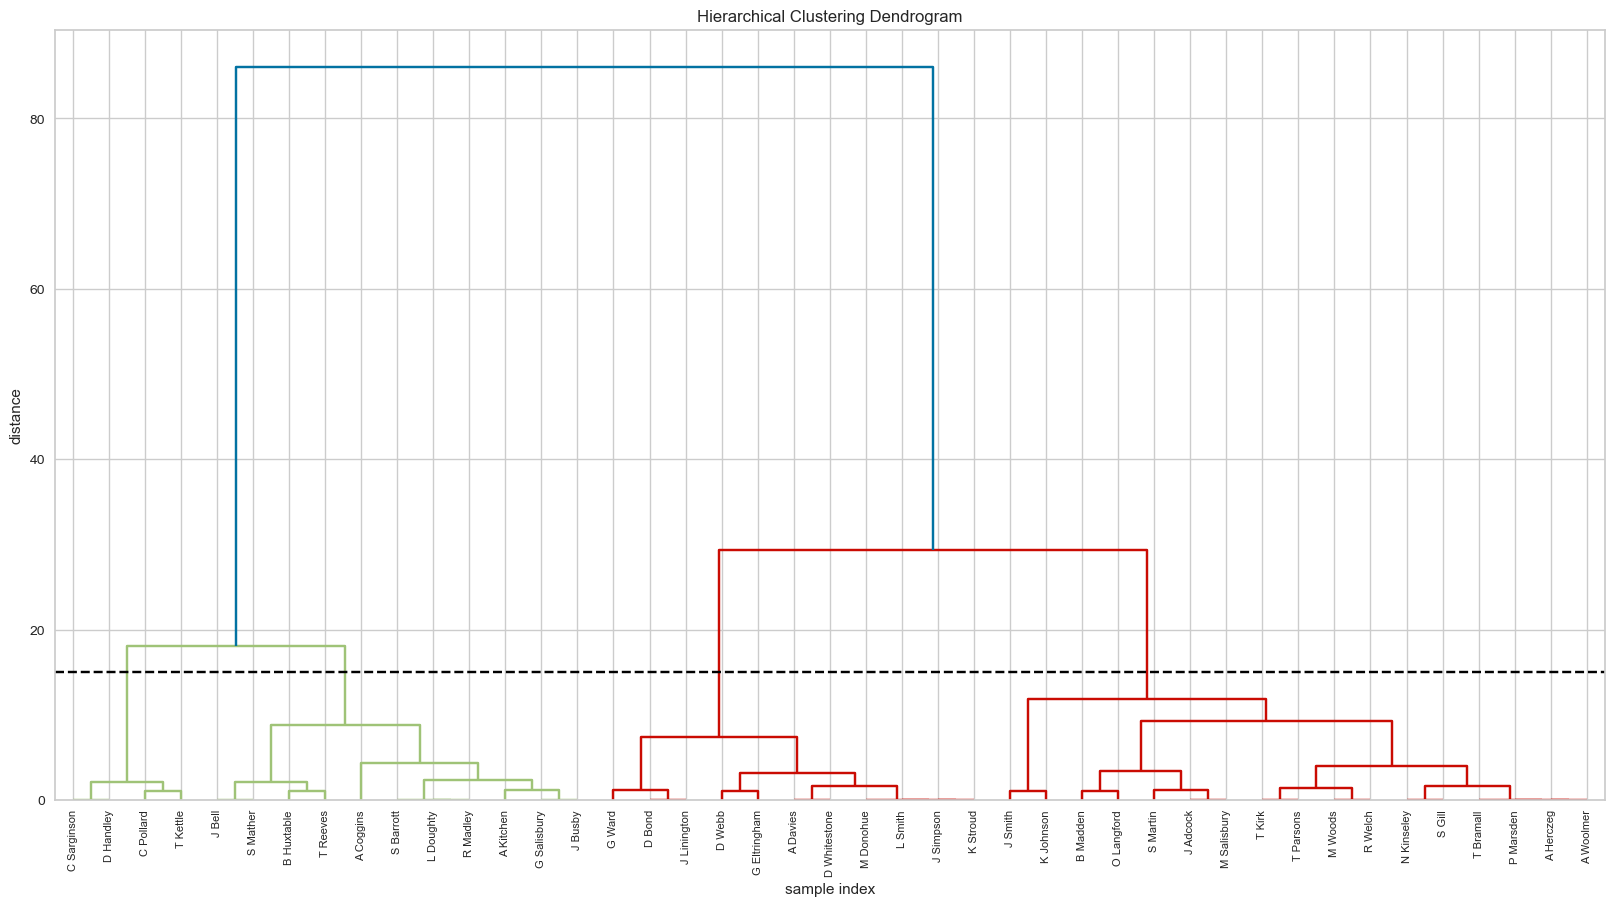

In [10]:
#for each dataset create a dendrogram that groups referees by their B365H odds with index as referee name
#PRM
plt.figure(figsize=(20,10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    linkage(PRM_b, method="ward"),
    labels=PRM_b.index,
    leaf_rotation=90
)
plt.axhline(y=20,ls='--',c='black')
plt.show()

#CHA
plt.figure(figsize=(20,10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    linkage(CHA_b, method="ward"),
    labels=CHA_b.index,
    leaf_rotation=90
)
plt.axhline(y=25,ls='--',c='black')
plt.show()

#L1
plt.figure(figsize=(20,10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    linkage(L1_b, method="ward"),
    labels=L1_b.index,
    leaf_rotation=90
)
plt.axhline(y=22,ls='--',c='black')
plt.show()

#L2
plt.figure(figsize=(20,10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    linkage(L2_b, method="ward"),
    labels=L2_b.index,
    leaf_rotation=90
)
plt.axhline(y=15,ls='--',c='black')
plt.show()

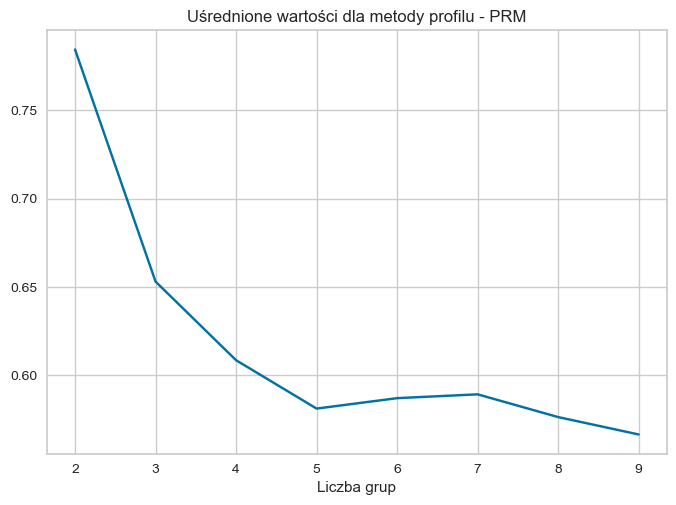

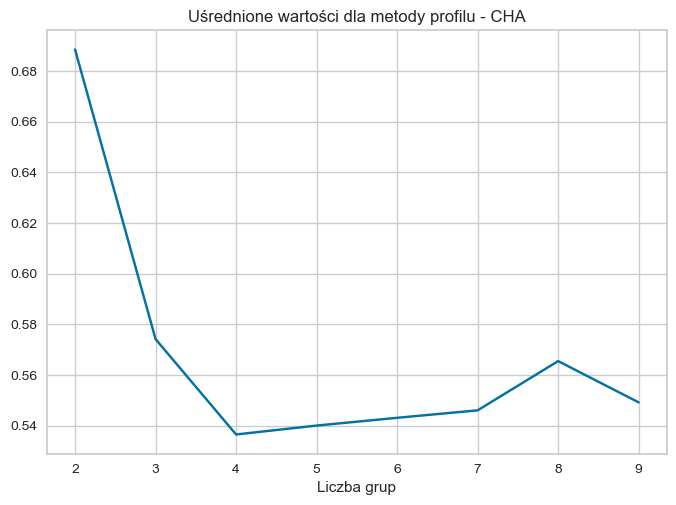

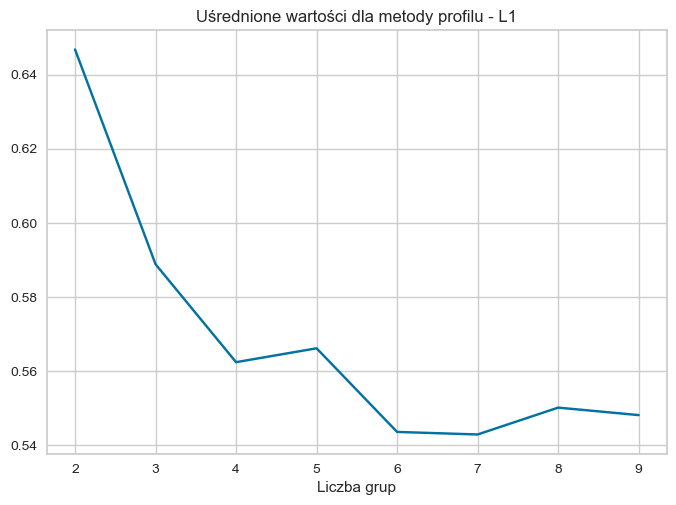

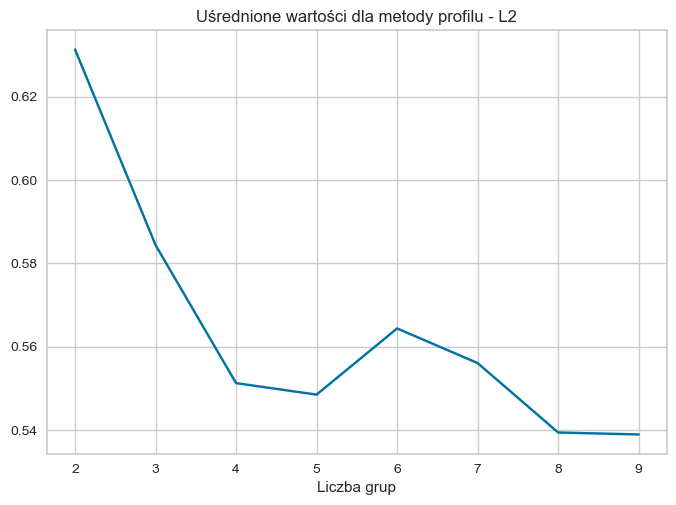

In [11]:
#grupy betowania per sędziowie i per drużyny gospodarzy
#metoda profilu
#sprawdzenie wyników metody profilu dla różnej liczby grup
for dataset in [PRM,CHA,L1,L2]:
    s_scores = []
    for i in range(2,10):
        km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        km.fit_predict(dataset["B365H"].values.reshape(-1,1))
        s_score = silhouette_score(dataset["B365H"].values.reshape(-1,1), km.labels_, metric='euclidean')
        s_scores.append(s_score)
    plt.plot(range(2,10),s_scores)
    plt.title("Uśrednione wartości dla metody profilu - {}".format(dataset["Level"][0]))
    plt.xlabel("Liczba grup")
    plt.show()


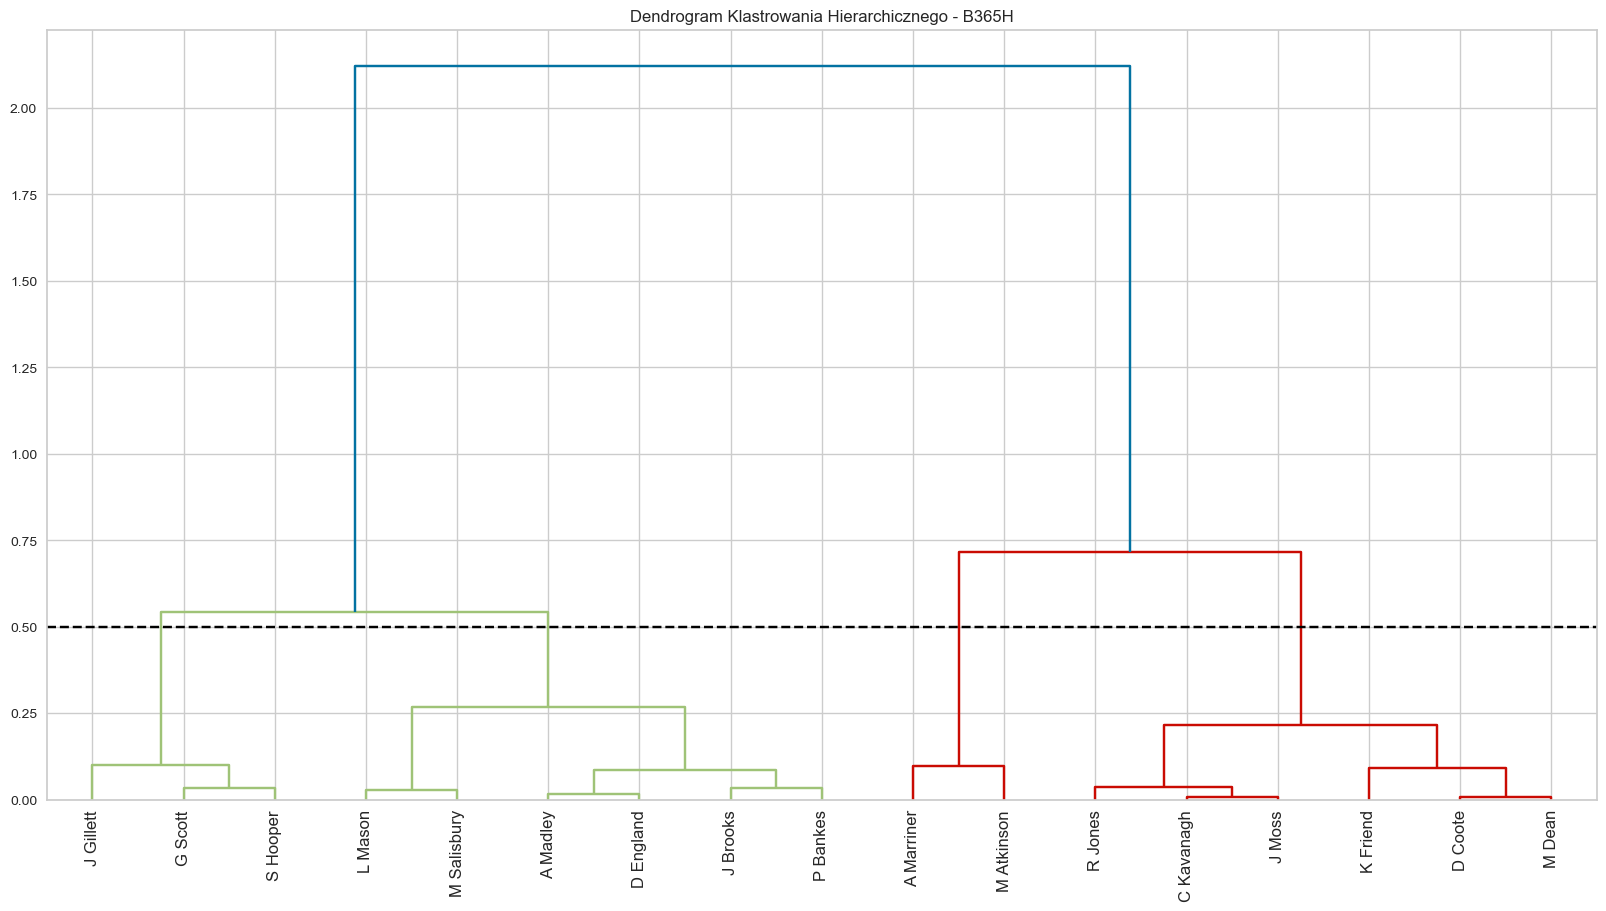

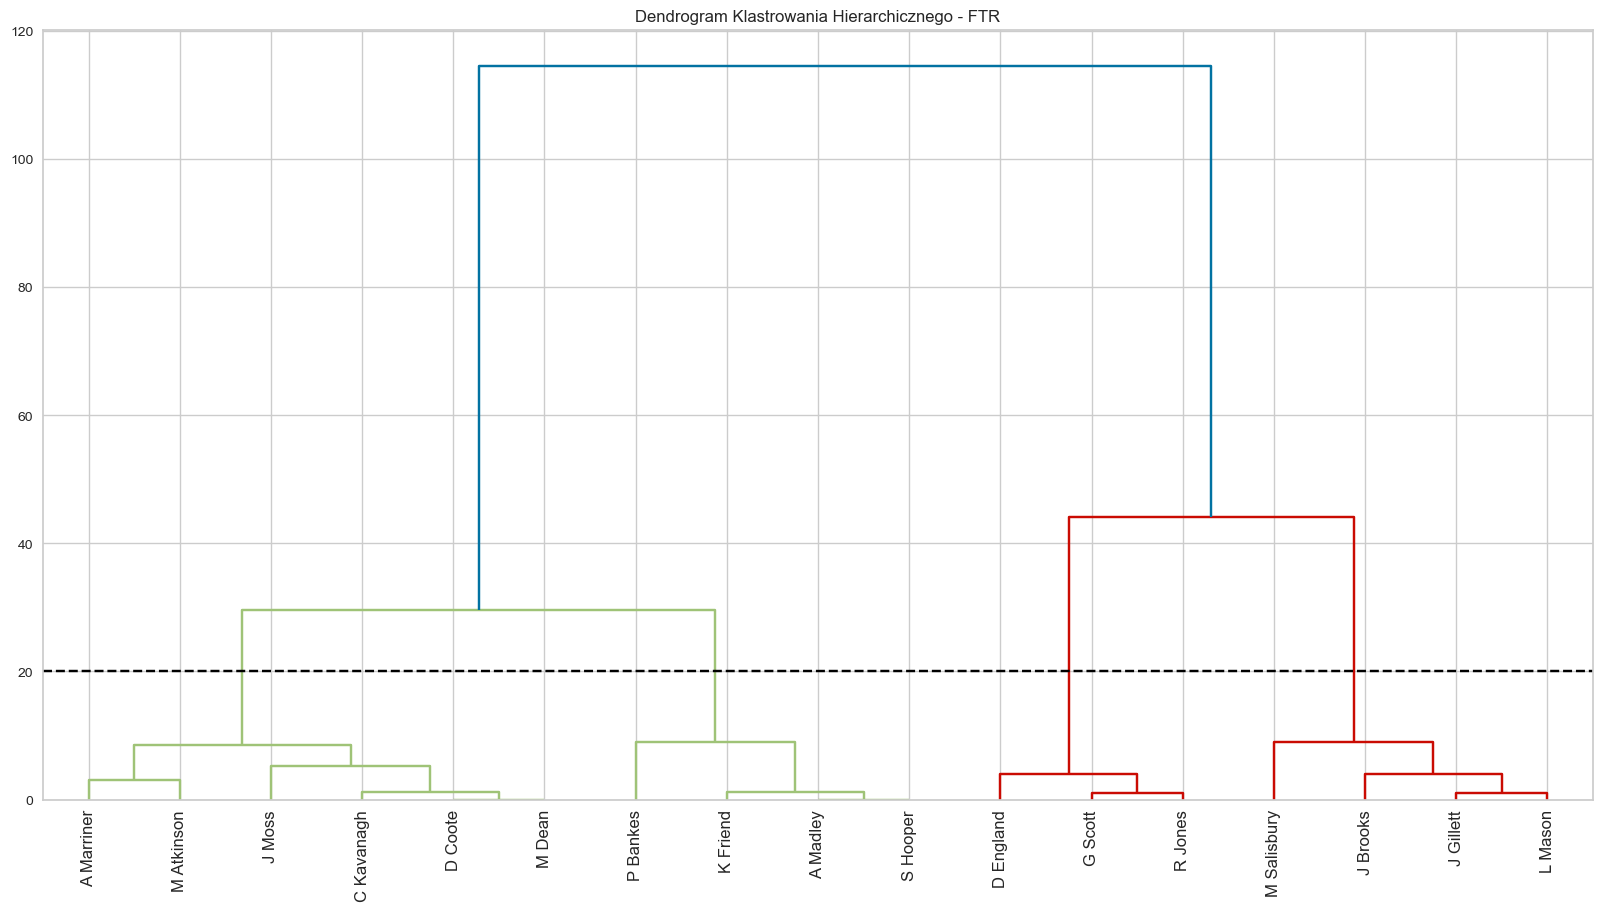

In [15]:
#PRM
plt.figure(figsize=(20,10))
plt.title('Dendrogram Klastrowania Hierarchicznego - B365H')
dendrogram(
    linkage(PRM_a, method="ward"),
    labels=PRM_a.index,
    leaf_rotation=90
)
plt.axhline(y=0.5,ls='--',c='black')
plt.show()

plt.figure(figsize=(20,10))
plt.title('Dendrogram Klastrowania Hierarchicznego - FTR')
dendrogram(
    linkage(PRM_b, method="ward"),
    labels=PRM_b.index,
    leaf_rotation=90
)
plt.axhline(y=20,ls='--',c='black')
plt.show()